In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
def _parse_line(line):
    """
    Do a regex search against all defined regexes and
    return the key and match result of the first matching regex

    """

    for key, rx in rx_dict.items():
        match = rx.search(line)
        if match:
            return key, match
    # if there are no matches
    return None, None

In [3]:
def parse_file(filepath, name):
    """
    Parse text at given filepath

    Parameters
    ----------
    filepath : str
        Filepath for file_object to be parsed

    Returns
    -------
    data : pd.DataFrame
        Parsed data

    """

    data = []  # create an empty list to collect the data
    # open the file and read through it line by line
    count = 0
    count_or = 0
    rnd='no round'
    with open(filepath, 'r') as file_object:
        line = file_object.readline()
        while line:
            # at each line check for a match with a regex
            key, match = _parse_line(line)

            # extract round
            if key == 'round':
                count += 1
                rnd_raw = match.group(1)
                opr = re.compile(r'Operating Round ')
                if opr.match(rnd_raw):
                    count_or+=1
                rnd = opr.sub('OR', rnd_raw)
                item = [count,count_or,name,None,None,None, rnd]
                
                data.append(item)

            # extract train buying
            if key == 'buytrain':
                count += 1
                company = match.group('company')
                train = match.group('train')
                source = match.group('source')
                item = [count,count_or,name,company,train,source, rnd]
                data.append(item)

            line = file_object.readline()

    df = pd.DataFrame(data, columns = ['Count', 'Count_OR', 'Game', 'Company', 'Train', 'Source', 'Round'])
    return df

In [4]:
rx_dict = {
    'round': re.compile(r'== Start of (.*) =='),
    'buytrain': re.compile(r'(?P<company>.*) buys a (?P<train>.*-train) from (?P<source>.*) for'),
    'name_score': re.compile(r'(?P<name_score>Name|Score)'),
}

In [5]:
rx_dict

{'round': re.compile(r'== Start of (.*) ==', re.UNICODE),
 'buytrain': re.compile(r'(?P<company>.*) buys a (?P<train>.*-train) from (?P<source>.*) for',
 re.UNICODE),
 'name_score': re.compile(r'(?P<name_score>Name|Score)', re.UNICODE)}

In [6]:
import os

logdir="logfiles"
directory = os.fsencode(logdir)

dflist=[]
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    filepath = os.path.join(logdir, filename)
    name = os.path.splitext(filename)[0]
    dff = parse_file(filepath, name)
    dflist.append(dff)
df=pd.concat(dflist)   


In [7]:
custom_dict = {'2-train': 0, '2+2-train': 1, '3-train': 2, '3+3-train': 3, '4-train': 4, '4+4-train': 5,
               '5-train': 6, '5+5-train': 7, '6-train': 8, '6+6-train': 9}
custom_dict

{'2-train': 0,
 '2+2-train': 1,
 '3-train': 2,
 '3+3-train': 3,
 '4-train': 4,
 '4+4-train': 5,
 '5-train': 6,
 '5+5-train': 7,
 '6-train': 8,
 '6+6-train': 9}

In [8]:
df['Train'] = pd.Categorical(
    df['Train'], categories=sorted(custom_dict, key=custom_dict.get), ordered=True
)

In [9]:
df_ipo = df[df['Source']=='IPO']

In [10]:
df_ipo

,Count,Count_OR,Game,Company,Train,Source,Round
3,4,1,R01,M1,2-train,IPO,OR1.1
4,5,1,R01,M3,2-train,IPO,OR1.1
5,6,1,R01,M4,2-train,IPO,OR1.1
6,7,1,R01,M5,2-train,IPO,OR1.1
7,8,1,R01,M6,2-train,IPO,OR1.1
8,9,1,R01,BY,2-train,IPO,OR1.1
9,10,1,R01,BY,2-train,IPO,OR1.1
12,13,2,R01,M2,2-train,IPO,OR2.1
13,14,2,R01,M4,2-train,IPO,OR2.1
16,17,3,R01,BY,2+2-train,IPO,OR3.1


In [11]:
df

,Count,Count_OR,Game,Company,Train,Source,Round
0,1,0,R01,None,NaN,None,initial round
1,2,0,R01,None,NaN,None,Stock Round 1
2,3,1,R01,None,NaN,None,OR1.1
3,4,1,R01,M1,2-train,IPO,OR1.1
4,5,1,R01,M3,2-train,IPO,OR1.1
5,6,1,R01,M4,2-train,IPO,OR1.1
6,7,1,R01,M5,2-train,IPO,OR1.1
7,8,1,R01,M6,2-train,IPO,OR1.1
8,9,1,R01,BY,2-train,IPO,OR1.1
9,10,1,R01,BY,2-train,IPO,OR1.1


In [12]:
import matplotlib.pyplot as plt

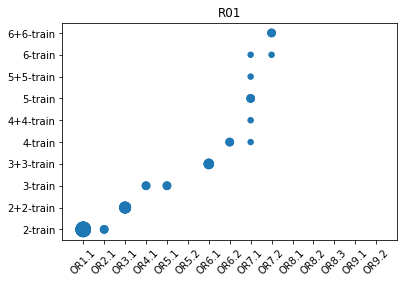

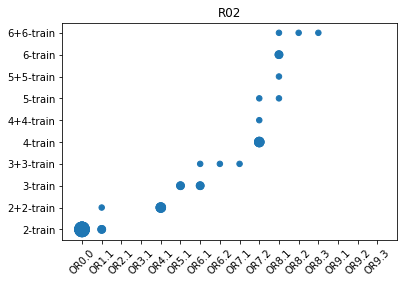

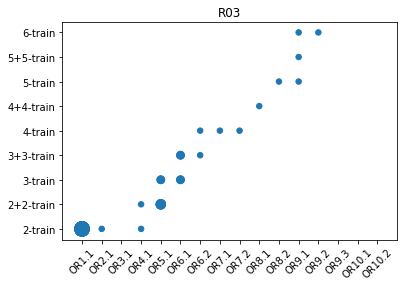

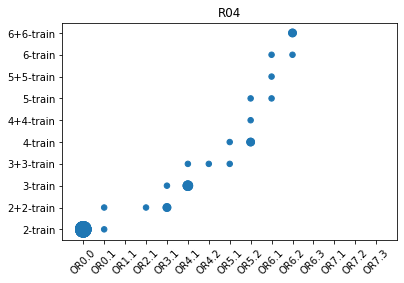

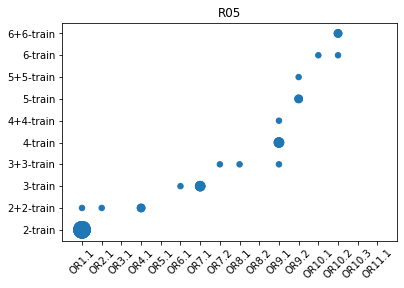

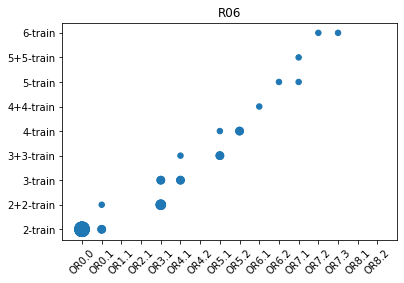

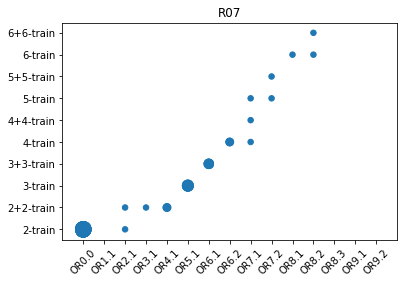

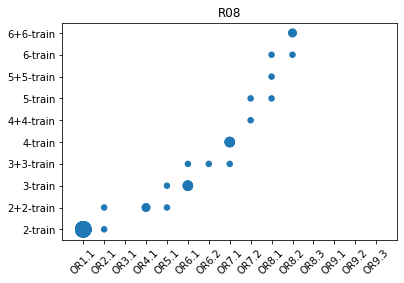

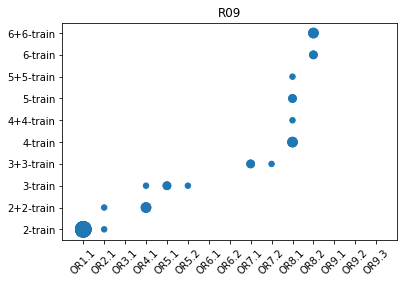

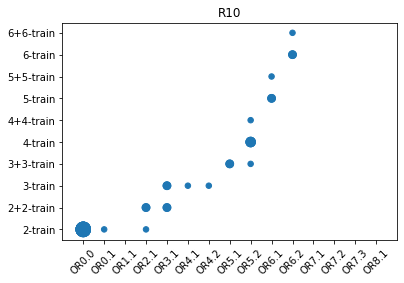

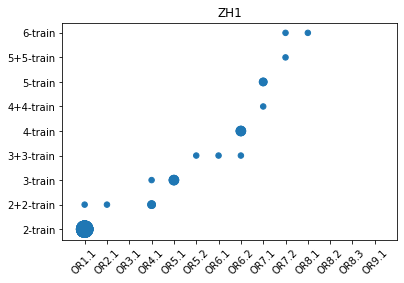

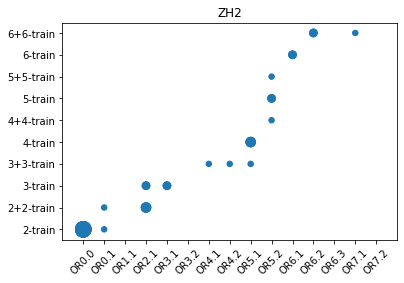

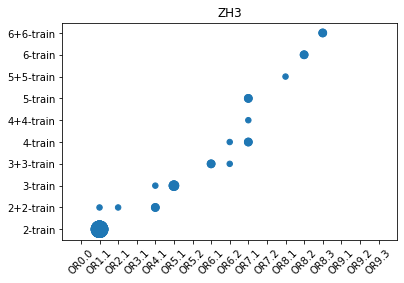

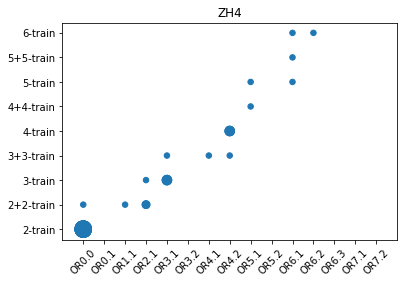

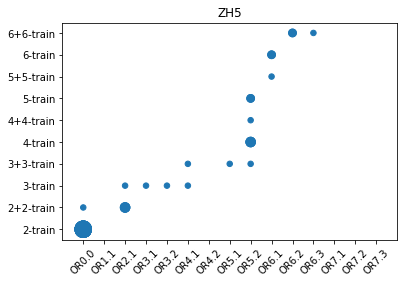

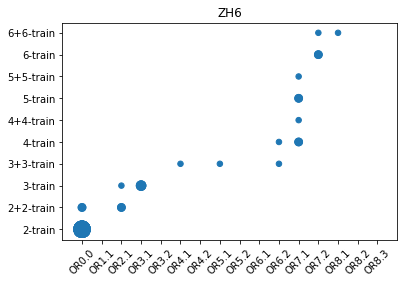

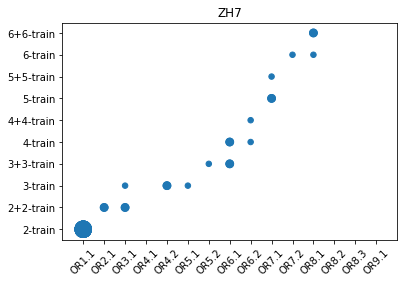

In [13]:
from collections import Counter

for game in df_ipo['Game'].unique():
    
    opr=re.compile(r'OR')
    select_all = df[df['Game']==game]
    unique=select_all.Round.unique()
    select_or=[el for el in unique if opr.match(el)]
    
    fig, ax = plt.subplots()
    select_ipo = df_ipo[df_ipo['Game']==game]
    x=select_ipo['Count_OR']-1
    y=select_ipo['Train']
    plt.title(game)
    #ax.margins(x=0.4, y=0.1)
    ax.set_xlim(-1,len(select_or))
   
    # count the occurrences of each point
    c = Counter(zip(x,y))
    # create a list of the sizes, here multiplied by 10 for scale
    s = [30*c[(xx,yy)] for xx,yy in zip(x,y)]

    ind = np.arange(len(select_or))
    plt.xticks(ind, select_or,rotation=45)
    plt.scatter(x,y, s=s)


In [14]:
select1 = df[df['Game']=="R01"]
select1.Round.unique()

array(['initial round', 'Stock Round 1', 'OR1.1', 'Stock Round 2',
       'OR2.1', 'Stock Round 3', 'OR3.1', 'Stock Round 4', 'OR4.1',
       'Stock Round 5', 'OR5.1', 'OR5.2', 'Stock Round 6', 'OR6.1',
       'OR6.2', 'Stock Round 7', 'OR7.1', 'OR7.2', 'Stock Round 8',
       'OR8.1', 'OR8.2', 'OR8.3', 'Stock Round 9', 'OR9.1', 'OR9.2'],
      dtype=object)

In [15]:
opr=re.compile(r'OR')
sel1=select1.Round.unique()
selectedlist=[el for el in sel1 if opr.match(el)]
selectedlist

['OR1.1',
 'OR2.1',
 'OR3.1',
 'OR4.1',
 'OR5.1',
 'OR5.2',
 'OR6.1',
 'OR6.2',
 'OR7.1',
 'OR7.2',
 'OR8.1',
 'OR8.2',
 'OR8.3',
 'OR9.1',
 'OR9.2']

In [16]:
len(selectedlist)

15

In [17]:
print(df_ipo.groupby(['Train', 'Game']).first().to_string())

                Count  Count_OR Company Source   Round
Train     Game                                        
2-train   R01     4.0       1.0      M1    IPO   OR1.1
          R02     3.0       1.0      M1    IPO   OR0.0
          R03     4.0       1.0      M1    IPO   OR1.1
          R04     3.0       1.0      M1    IPO   OR0.0
          R05     4.0       1.0      M1    IPO   OR1.1
          R06     3.0       1.0      M1    IPO   OR0.0
          R07     3.0       1.0      M1    IPO   OR0.0
          R08     4.0       1.0      M1    IPO   OR1.1
          R09     4.0       1.0      M1    IPO   OR1.1
          R10     3.0       1.0      M1    IPO   OR0.0
          ZH1     4.0       1.0      M1    IPO   OR1.1
          ZH2     3.0       1.0      M1    IPO   OR0.0
          ZH3     6.0       2.0      M1    IPO   OR1.1
          ZH4     3.0       1.0      M1    IPO   OR0.0
          ZH5     3.0       1.0      M1    IPO   OR0.0
          ZH6     3.0       1.0      M1    IPO   OR0.0
          

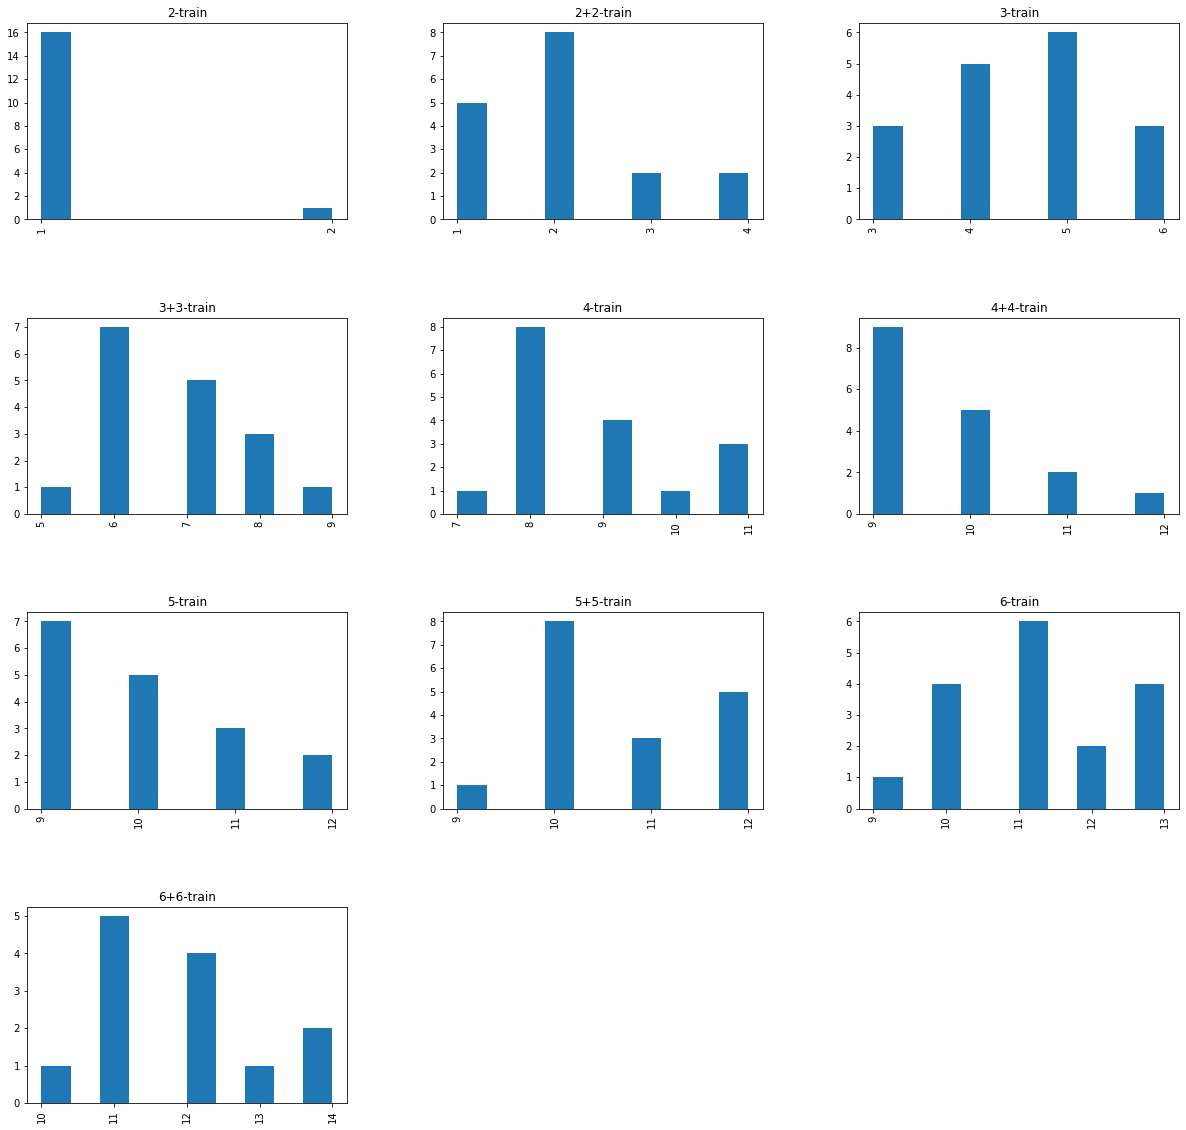

In [18]:
from matplotlib.ticker import MaxNLocator

gr=df_ipo.groupby(['Train', 'Game']).first()

ax=gr.hist(by="Train", column="Count_OR", figsize=(20,20))
for row in ax:
    for col in row:
        col.xaxis.set_major_locator(MaxNLocator(integer=True))

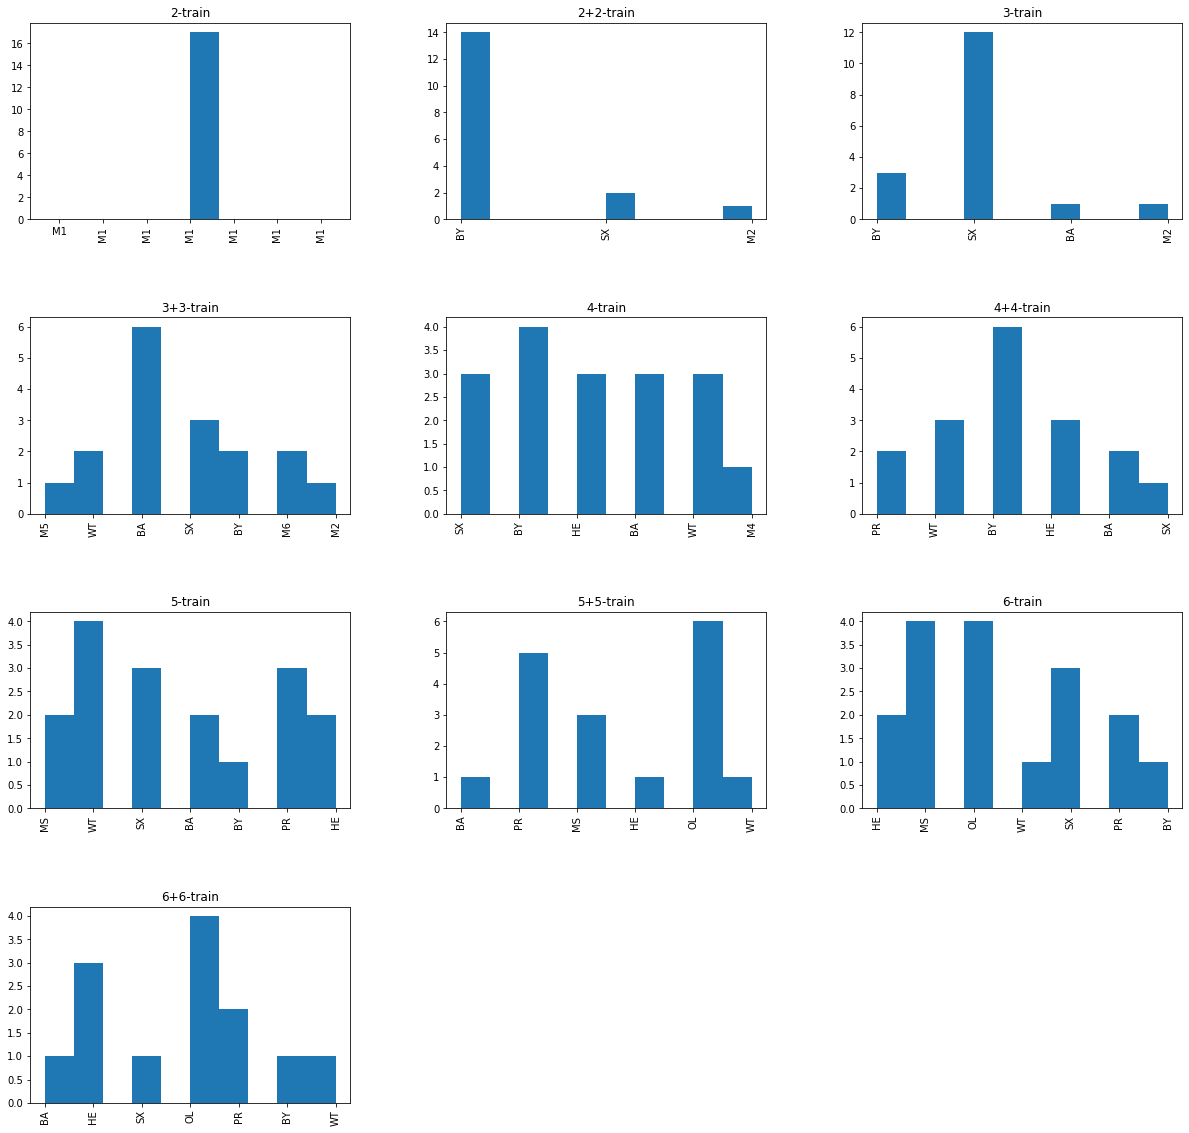

In [19]:
from matplotlib.ticker import MaxNLocator

grc=df_ipo.groupby(['Train', 'Game']).first()

ax=grc.hist(by="Train", column="Company", figsize=(20,20))
for row in ax:
    for col in row:
        col.xaxis.set_major_locator(MaxNLocator(integer=True))

In [60]:
gr=df_ipo.groupby(['Game', 'Train'])
#gr.get_group(('R01','2-train'))['Count_OR'].iloc[0]
firsttrainslist = []
for game in df_ipo['Game'].unique():
    firsttrains=[game]
    for train in custom_dict:
        if ((df_ipo['Game']==game) & (df_ipo['Train']==train)).any():
            first = gr.get_group((game,train))['Count_OR'].iloc[0]
            firsttrains.append(first)
    firsttrainslist.append(firsttrains)

columns = [k for k in custom_dict]
columns.insert(0,'Game')
ft = pd.DataFrame(firsttrainslist, columns=columns)
ft['2-4'] = ft.apply(lambda x: x['4-train']- x['2-train'], axis=1)
ft['2+2-4+4'] = ft.apply(lambda x: x['4+4-train']- x['2+2-train'], axis=1)
ft['3-6'] = ft.apply(lambda x: x['6-train']- x['3-train'], axis=1)
ft['3+3-6+6'] = ft.apply(lambda x: x['6+6-train']- x['3+3-train'], axis=1)
ft

,Game,2-train,2+2-train,3-train,3+3-train,4-train,4+4-train,5-train,5+5-train,6-train,6+6-train,2-4,2+2-4+4,3-6,3+3-6+6
0,R01,1,3,4,7,8,9,9,9,9,10.0,7,6,5,3.0
1,R02,1,2,6,7,10,10,10,11,11,11.0,9,8,5,4.0
2,R03,1,4,5,6,7,10,11,12,12,NaN,6,6,7,NaN
3,R04,1,2,5,6,8,9,9,10,10,11.0,7,7,5,5.0
4,R05,1,1,6,8,11,11,12,12,13,14.0,10,10,7,6.0
5,R06,1,2,5,6,8,10,11,12,13,NaN,7,8,8,NaN
6,R07,1,3,6,7,8,9,9,10,11,12.0,7,6,5,5.0
7,R08,1,2,5,6,8,9,9,10,10,11.0,7,7,5,5.0
8,R09,1,2,4,9,11,11,11,11,12,12.0,10,9,8,3.0
9,R10,1,4,5,8,9,9,10,10,11,11.0,8,5,6,3.0


array([ 5.5,  6.5,  7.5,  8.5,  9.5, 10.5])

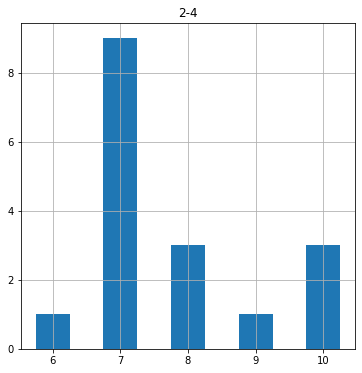

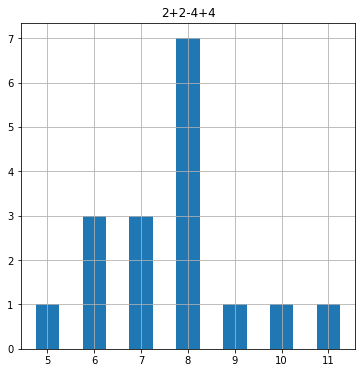

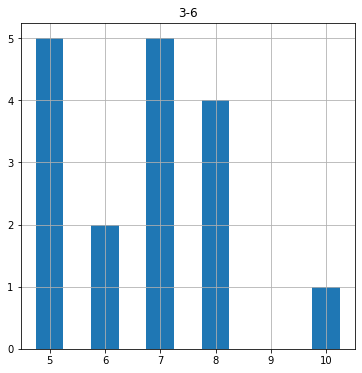

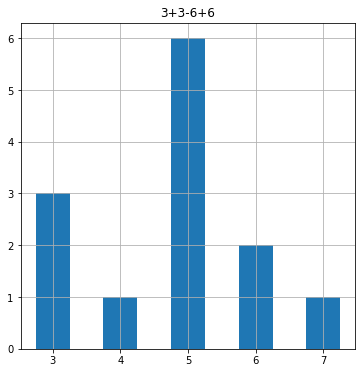

In [120]:

for column in ["2-4", "2+2-4+4", "3-6", "3+3-6+6"]:
    bins=np.arange(ft[column].min(), ft[column].max()+2)-0.5
    ax=ft.hist(column=column, figsize=(6,6), bins=bins, rwidth=0.5)
    for row in ax:
        for col in row:
            col.xaxis.set_major_locator(MaxNLocator(integer=True))

In [31]:
def strip(key):
    return key.replace('-train', '')
for key in custom_dict:
    print(key, strip(key))

2-train 2
2+2-train 2+2
3-train 3
3+3-train 3+3
4-train 4
4+4-train 4+4
5-train 5
5+5-train 5+5
6-train 6
6+6-train 6+6


In [48]:
diflist = []
for game in firsttrainslist:
    diflistgame = [game[0]]
    for first in range(1,len(game)):
        diflistfirst=[]
        for second in range(first+1,len(game)):
            dif=game[second]-game[first]
            diflistfirst.append(dif)
        diflistgame.append(diflistfirst)
    diflist.append(diflistgame)
diflist            

[['R01',
  [2, 3, 6, 7, 8, 8, 8, 8, 9],
  [1, 4, 5, 6, 6, 6, 6, 7],
  [3, 4, 5, 5, 5, 5, 6],
  [1, 2, 2, 2, 2, 3],
  [1, 1, 1, 1, 2],
  [0, 0, 0, 1],
  [0, 0, 1],
  [0, 1],
  [1],
  []],
 ['R02',
  [1, 5, 6, 9, 9, 9, 10, 10, 10],
  [4, 5, 8, 8, 8, 9, 9, 9],
  [1, 4, 4, 4, 5, 5, 5],
  [3, 3, 3, 4, 4, 4],
  [0, 0, 1, 1, 1],
  [0, 1, 1, 1],
  [1, 1, 1],
  [0, 0],
  [0],
  []],
 ['R03',
  [3, 4, 5, 6, 9, 10, 11, 11],
  [1, 2, 3, 6, 7, 8, 8],
  [1, 2, 5, 6, 7, 7],
  [1, 4, 5, 6, 6],
  [3, 4, 5, 5],
  [1, 2, 2],
  [1, 1],
  [0],
  []],
 ['R04',
  [1, 4, 5, 7, 8, 8, 9, 9, 10],
  [3, 4, 6, 7, 7, 8, 8, 9],
  [1, 3, 4, 4, 5, 5, 6],
  [2, 3, 3, 4, 4, 5],
  [1, 1, 2, 2, 3],
  [0, 1, 1, 2],
  [1, 1, 2],
  [0, 1],
  [1],
  []],
 ['R05',
  [0, 5, 7, 10, 10, 11, 11, 12, 13],
  [5, 7, 10, 10, 11, 11, 12, 13],
  [2, 5, 5, 6, 6, 7, 8],
  [3, 3, 4, 4, 5, 6],
  [0, 1, 1, 2, 3],
  [1, 1, 2, 3],
  [0, 1, 2],
  [1, 2],
  [1],
  []],
 ['R06',
  [1, 4, 5, 7, 9, 10, 11, 12],
  [3, 4, 6, 8, 9, 10, 11],
  [1, 3, 5

In [50]:
ft2 = pd.DataFrame(diflist, columns=columns)
ft2

,Game,2-train,2+2-train,3-train,3+3-train,4-train,4+4-train,5-train,5+5-train,6-train,6+6-train
0,R01,"[2, 3, 6, 7, 8, 8, 8, 8, 9]","[1, 4, 5, 6, 6, 6, 6, 7]","[3, 4, 5, 5, 5, 5, 6]","[1, 2, 2, 2, 2, 3]","[1, 1, 1, 1, 2]","[0, 0, 0, 1]","[0, 0, 1]","[0, 1]",[1],[]
1,R02,"[1, 5, 6, 9, 9, 9, 10, 10, 10]","[4, 5, 8, 8, 8, 9, 9, 9]","[1, 4, 4, 4, 5, 5, 5]","[3, 3, 3, 4, 4, 4]","[0, 0, 1, 1, 1]","[0, 1, 1, 1]","[1, 1, 1]","[0, 0]",[0],[]
2,R03,"[3, 4, 5, 6, 9, 10, 11, 11]","[1, 2, 3, 6, 7, 8, 8]","[1, 2, 5, 6, 7, 7]","[1, 4, 5, 6, 6]","[3, 4, 5, 5]","[1, 2, 2]","[1, 1]",[0],[],None
3,R04,"[1, 4, 5, 7, 8, 8, 9, 9, 10]","[3, 4, 6, 7, 7, 8, 8, 9]","[1, 3, 4, 4, 5, 5, 6]","[2, 3, 3, 4, 4, 5]","[1, 1, 2, 2, 3]","[0, 1, 1, 2]","[1, 1, 2]","[0, 1]",[1],[]
4,R05,"[0, 5, 7, 10, 10, 11, 11, 12, 13]","[5, 7, 10, 10, 11, 11, 12, 13]","[2, 5, 5, 6, 6, 7, 8]","[3, 3, 4, 4, 5, 6]","[0, 1, 1, 2, 3]","[1, 1, 2, 3]","[0, 1, 2]","[1, 2]",[1],[]
5,R06,"[1, 4, 5, 7, 9, 10, 11, 12]","[3, 4, 6, 8, 9, 10, 11]","[1, 3, 5, 6, 7, 8]","[2, 4, 5, 6, 7]","[2, 3, 4, 5]","[1, 2, 3]","[1, 2]",[1],[],None
6,R07,"[2, 5, 6, 7, 8, 8, 9, 10, 11]","[3, 4, 5, 6, 6, 7, 8, 9]","[1, 2, 3, 3, 4, 5, 6]","[1, 2, 2, 3, 4, 5]","[1, 1, 2, 3, 4]","[0, 1, 2, 3]","[1, 2, 3]","[1, 2]",[1],[]
7,R08,"[1, 4, 5, 7, 8, 8, 9, 9, 10]","[3, 4, 6, 7, 7, 8, 8, 9]","[1, 3, 4, 4, 5, 5, 6]","[2, 3, 3, 4, 4, 5]","[1, 1, 2, 2, 3]","[0, 1, 1, 2]","[1, 1, 2]","[0, 1]",[1],[]
8,R09,"[1, 3, 8, 10, 10, 10, 10, 11, 11]","[2, 7, 9, 9, 9, 9, 10, 10]","[5, 7, 7, 7, 7, 8, 8]","[2, 2, 2, 2, 3, 3]","[0, 0, 0, 1, 1]","[0, 0, 1, 1]","[0, 1, 1]","[1, 1]",[0],[]
9,R10,"[3, 4, 7, 8, 8, 9, 9, 10, 10]","[1, 4, 5, 5, 6, 6, 7, 7]","[3, 4, 4, 5, 5, 6, 6]","[1, 1, 2, 2, 3, 3]","[0, 1, 1, 2, 2]","[1, 1, 2, 2]","[0, 1, 1]","[1, 1]",[0],[]


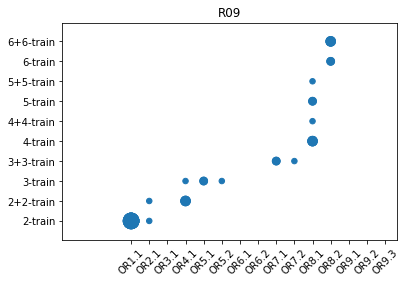

In [21]:

game='R09'
if True:
    
    opr=re.compile(r'OR')
    select_all = df[df['Game']==game]
    unique=select_all.Round.unique()
    select_or=[el for el in unique if opr.match(el)]
    
    fig, ax = plt.subplots()
    select_ipo = df_ipo[df_ipo['Game']==game]
    x=select_ipo['Count_OR']
    y=select_ipo['Train']
    
    # count the occurrences of each point
    c = Counter(zip(x,y))
    # create a list of the sizes, here multiplied by 10 for scale
    s = [30*c[(xx,yy)] for xx,yy in zip(x,y)]
    
    plt.title(game)
    ax.margins(x=0.3, y=0.1)
   
    
    ind = np.arange(len(select_or))
    plt.xticks(ind, select_or,rotation=45)
    plt.scatter(x-1,y, s=s)
    


In [22]:
select_ipo

,Count,Count_OR,Game,Company,Train,Source,Round
3,4,1,R09,M1,2-train,IPO,OR1.1
4,5,1,R09,M3,2-train,IPO,OR1.1
5,6,1,R09,M4,2-train,IPO,OR1.1
6,7,1,R09,M5,2-train,IPO,OR1.1
7,8,1,R09,M6,2-train,IPO,OR1.1
8,9,1,R09,BY,2-train,IPO,OR1.1
9,10,1,R09,BY,2-train,IPO,OR1.1
10,11,1,R09,BY,2-train,IPO,OR1.1
13,14,2,R09,M2,2-train,IPO,OR2.1
14,15,2,R09,BY,2+2-train,IPO,OR2.1


In [23]:
df_ipo


,Count,Count_OR,Game,Company,Train,Source,Round
3,4,1,R01,M1,2-train,IPO,OR1.1
4,5,1,R01,M3,2-train,IPO,OR1.1
5,6,1,R01,M4,2-train,IPO,OR1.1
6,7,1,R01,M5,2-train,IPO,OR1.1
7,8,1,R01,M6,2-train,IPO,OR1.1
8,9,1,R01,BY,2-train,IPO,OR1.1
9,10,1,R01,BY,2-train,IPO,OR1.1
12,13,2,R01,M2,2-train,IPO,OR2.1
13,14,2,R01,M4,2-train,IPO,OR2.1
16,17,3,R01,BY,2+2-train,IPO,OR3.1


In [24]:
df

,Count,Count_OR,Game,Company,Train,Source,Round
0,1,0,R01,None,NaN,None,initial round
1,2,0,R01,None,NaN,None,Stock Round 1
2,3,1,R01,None,NaN,None,OR1.1
3,4,1,R01,M1,2-train,IPO,OR1.1
4,5,1,R01,M3,2-train,IPO,OR1.1
5,6,1,R01,M4,2-train,IPO,OR1.1
6,7,1,R01,M5,2-train,IPO,OR1.1
7,8,1,R01,M6,2-train,IPO,OR1.1
8,9,1,R01,BY,2-train,IPO,OR1.1
9,10,1,R01,BY,2-train,IPO,OR1.1
